In [2]:
import Augmentor
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [3]:
path_images = "./images"
path_labels = "./labels"

In [4]:
images_png = glob.glob(path_images+"/*.png")
images_tiff = glob.glob(path_images+"/*.tiff")
labels_png = glob.glob(path_labels+"/*.png")
labels_tiff = glob.glob(path_labels+"/*.tiff")
images = [images_png, images_tiff]
labels = [labels_png, labels_tiff]

In [5]:
num_images = len(images_png) + len(images_tiff)
num_labels = len(labels_png) + len(labels_tiff)

print("number of images: ", num_images)
print("number of labels: ", num_labels)
print("Is number of images is the same as number of labels? " + str(len(images)==len(labels)))

number of images:  31
number of labels:  26
Is number of images is the same as number of labels? True


In [6]:
names_images_png = np.zeros(len(images_png))
 
for i in range (0, len(images_png)): 
    names_images_png[i] = int(images_png[i][len("./images\\"):-4]) # png files for images

names_labels_png = np.zeros(len(labels_png))
 
for i in range (0, len(labels_png)): 
    names_labels_png[i] = int(labels_png[i][len("./labels\\"):-4]) # png files for images

In [7]:
# Return the sorted, unique values in both of images and labels
intersect_names, index_images, index_labels = np.intersect1d(names_images_png, names_labels_png, return_indices=True)

In [8]:
collated_images_and_labels = []

for i in range(0, len(intersect_names)):
    collated_images_and_labels.append(("./images/"+str(int(intersect_names[i]))+".png", "./labels/"+str(int(intersect_names[i]))+".png"))

collated_images_and_labels.append((images_tiff[0], labels_tiff[0]))

print(collated_images_and_labels)

[('./images/121.png', './labels/121.png'), ('./images/241.png', './labels/241.png'), ('./images/270.png', './labels/270.png'), ('./images/272.png', './labels/272.png'), ('./images/274.png', './labels/274.png'), ('./images/278.png', './labels/278.png'), ('./images/284.png', './labels/284.png'), ('./images/287.png', './labels/287.png'), ('./images/300.png', './labels/300.png'), ('./images/301.png', './labels/301.png'), ('./images/303.png', './labels/303.png'), ('./images/308.png', './labels/308.png'), ('./images/314.png', './labels/314.png'), ('./images/315.png', './labels/315.png'), ('./images/317.png', './labels/317.png'), ('./images/320.png', './labels/320.png'), ('./images/324.png', './labels/324.png'), ('./images/328.png', './labels/328.png'), ('./images/337.png', './labels/337.png'), ('./images/343.png', './labels/343.png'), ('./images/345.png', './labels/345.png'), ('./images/379.png', './labels/379.png'), ('./images/381.png', './labels/381.png'), ('./images/417.png', './labels/41

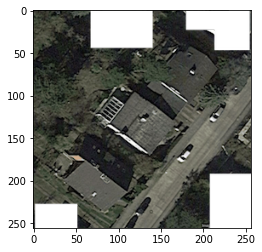

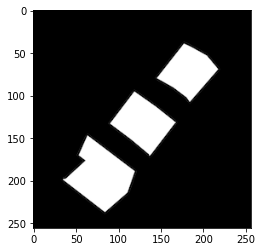

In [8]:
plt.imshow(Image.open(collated_images_and_labels[10][0]))
plt.figure()
plt.imshow(Image.open(collated_images_and_labels[10][1]), cmap="gray")

In [9]:
# Now we read these as arrays into a data structure that can be read by DataPipeline using a nested list comprehension for brevity

images = [[np.asarray(Image.open(y)) for y in x] for x in collated_images_and_labels]

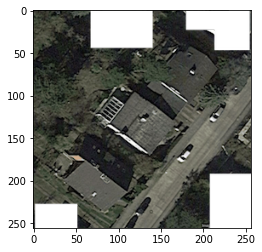

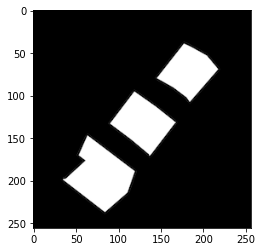

In [10]:
plt.imshow(images[10][0])
plt.figure()
plt.imshow(images[10][1], cmap="gray")

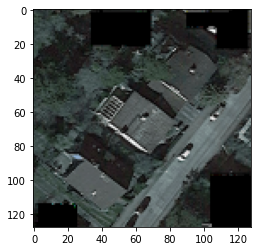

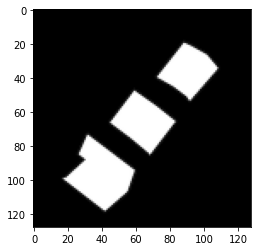

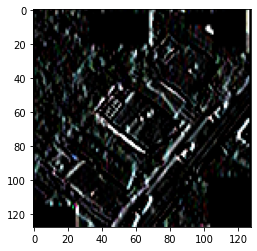

In [36]:
import cv2

img1 = cv2.resize(cv2.imread(collated_images_and_labels[10][0]), dsize=(128,128))
plt.imshow(img1)

plt.figure()
img2 = cv2.resize(cv2.imread(collated_images_and_labels[10][1]), dsize=(128,128))
plt.imshow(img2)

# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# img_1 = cv2.filter2D(img1, -1, kernel)

img_1 = cv2.Sobel(img1,cv2.CV_8U,1,0)

plt.figure()
plt.imshow(img_1)

In [11]:
# Now we can intialize a DataPipeline object using images data structure and a label list:

# label_list = [0, 1]

p = Augmentor.DataPipeline(images)


In [12]:
# Add some operations to an existing pipeline.

# First, we add a horizontal flip operation to the pipeline:
# p.flip_left_right(probability=0.5)

# Now we add a vertical flip operation to the pipeline:
# p.flip_top_bottom(probability=0.5)

# Add a rotate90 operation to the pipeline:
# p.rotate90(probability=0.5)
p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)

p.rotate_random_90(probability=1)

In [27]:
# Here we sample 100,000 images from the pipeline.

# It is often useful to use scientific notation for specify
# large numbers with trailing zeros.
num_samples = int(1000)

# Now we can sample from the pipeline:
augmented_data = p.sample(num_samples)

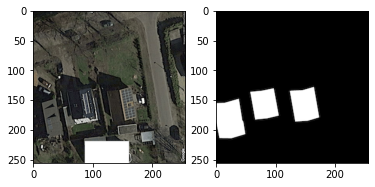

In [28]:
r_index = np.random.randint(0, len(augmented_data)-1)
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(augmented_data[r_index][0])
axarr[1].imshow(augmented_data[r_index][1], cmap="gray")

In [38]:
num_channels_inp = 4 # RGB format of images
num_channels_out = 1
img_size_x = 256
img_size_y = 256

input_data = np.zeros((num_samples, img_size_x, img_size_y, num_channels_inp))
output_data = np.zeros((num_samples, img_size_x, img_size_y, num_channels_out))

for i in range(0, num_samples):
    input_data[i, :, :, :] = augmented_data[i][0]
    output_data[i, :, :, :] = np.reshape(augmented_data[i][1],(img_size_x, img_size_y, num_channels_out))


In [39]:
np.save('input_data.npy', input_data[:,:,:,0:3]) # Note the shape of input_data
np.save('output_data.npy', output_data)

In [40]:
input_data = np.load('input_data.npy', allow_pickle=True)
output_data = np.load('output_data.npy', allow_pickle=True)

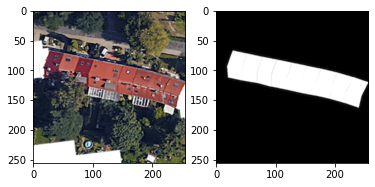

In [53]:
r_index = np.random.randint(0, len(augmented_data)-1)
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(np.uint8(input_data[r_index,:,:,:]))
axarr[1].imshow(output_data[r_index], cmap="gray")